# Bank dataset

We have a transaction details of 515 banks which include number of DD taken, Withdrawals, Deposits, Area of the branch and Average Walk-Ins. Profile the banks into segments and come up with recommendations for each segment.

# Import libraries and load data

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("bank.csv")
df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


# Check the data. Check shape, data type, and info

In [4]:
df.shape

(515, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
Bank                   515 non-null int64
DD                     515 non-null int64
Withdrawals            515 non-null int64
Deposits               515 non-null int64
Branch Area in sqft    515 non-null int64
avg daily walkins      515 non-null int64
dtypes: int64(6)
memory usage: 24.3 KB


# Checking Summary Statistic

In [6]:
df.describe()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,258.000000,232.252427,150.693204,81.687379,2934.669903,598.603883
std,148.811962,66.648815,56.897777,28.596912,437.062831,83.487891
min,1.000000,120.000000,10.000000,33.000000,1200.000000,380.000000
25%,129.500000,169.500000,103.000000,58.000000,2675.000000,537.500000
50%,258.000000,237.000000,152.000000,80.000000,2960.000000,601.000000
75%,386.500000,291.000000,200.000000,105.000000,3300.000000,657.500000
max,515.000000,350.000000,247.000000,212.000000,3650.000000,838.000000


# Checking for Duplicates

In [7]:
df.duplicated(subset=None, keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
510    False
511    False
512    False
513    False
514    False
Length: 515, dtype: bool

In [8]:
duplicateRowsDF =df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Bank, DD, Withdrawals, Deposits, Branch Area in sqft, avg daily walkins]
Index: []


No duplicates have been found

# Scaling the data

In [9]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler


In [10]:
# Creating an object for the StandardScaler function
sc = StandardScaler()
scaled_df = sc.fit_transform(df)
scaled_df.shape

(515, 6)

In [11]:
scaled_df

array([[-1.72869086, -0.07888413, -0.06497257,  1.02602411, -1.08710095,
         0.48432644],
       [-1.72196444, -1.64081915, -1.13811308, -0.58410514,  1.31763546,
        -1.949528  ],
       [-1.71523801,  1.10758573, -0.02978763, -0.19907423, -0.83517619,
         0.84400936],
       ...,
       [ 1.71523801,  1.51308809, -1.13811308,  0.92101568, -0.19391314,
         0.92793538],
       [ 1.72196444, -0.60453534,  0.44520899, -1.66919225, -0.40003341,
        -1.12225728],
       [ 1.72869086,  1.48305088,  0.62113366,  0.53598477, -0.53744692,
         2.01897357]])

# Creating Clusters using KMeans

### Build a KMeans model having 2 Clusters

In [12]:
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [13]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters=2,n_init = 15, random_state=10)


In [14]:
# Fit K means on the scaled_df

k_means.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

### Check cluster Output for all the observations

In [15]:
# Get the labels
k_means.labels_

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [16]:
df['labels'] = pd.DataFrame(k_means.labels_ , columns = list(['labels']))

In [17]:
pd.value_counts(df['labels'])

1    273
0    242
Name: labels, dtype: int64

### Calculate within Cluster Sum of Squares

In [18]:
centroids = k_means.cluster_centers_

In [19]:
centroids

array([[ 0.29337769, -0.39551607, -0.62611412, -0.177089  ,  0.28850102,
        -0.81073025],
       [-0.26006374,  0.35060398,  0.55501691,  0.15697999, -0.25574083,
         0.71866931]])

In [20]:
wss = k_means.inertia_

In [21]:
wss

2447.950426054663

### Form clusters with K = 1,3,4,5,6 and compare the WSS ( within cluster sum of squares)

In [22]:
cluster_range = range( 1, 7)
cluster_wss = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5,random_state=5)
  clusters.fit(scaled_df)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_wss.append( clusters.inertia_ )    # capture the intertia






# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_wss": cluster_wss} )
clusters_df

,num_clusters,cluster_wss
0,1,3090.000000
1,2,2447.950426
2,3,2101.882516
3,4,1853.171278
4,5,1702.487060
5,6,1578.290449


### Calculate WSS for other values of K ( can use range of K = 1 to 20) - Elbow Method

    clusters_K          wss
0            1  3090.000000
1            2  2447.950426
2            3  2101.877363
3            4  1852.090259
4            5  1702.487060
5            6  1569.167236
6            7  1468.388277
7            8  1384.232273
8            9  1321.246655
9           10  1247.308139
10          11  1197.196802
11          12  1130.982403
12          13  1094.106651
13          14  1048.243661
14          15  1019.725481
15          16   976.442714
16          17   955.771364
17          18   934.808701
18          19   909.510685
19          20   879.409813


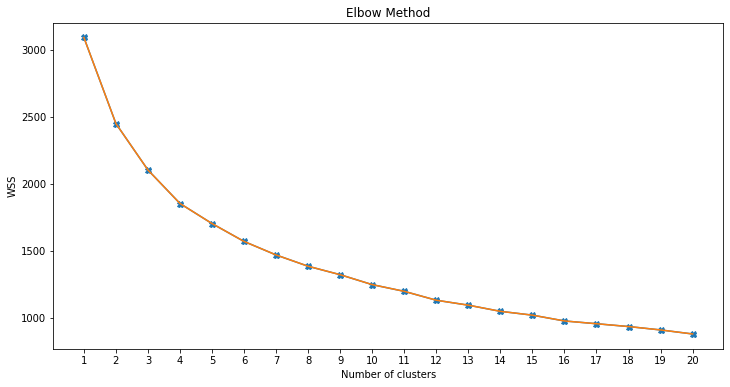

In [23]:
wss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=5)
    kmeans.fit(scaled_df)
    wss.append(kmeans.inertia_)
clusters_df1_20 = pd.DataFrame( { "clusters_K":range(1,21), "wss":wss} )
print(clusters_df1_20)
plt.figure(figsize = (12,6))
plt.plot(np.arange(1, 21), wss, marker = 'X')
plt.plot(range(1, 21), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1, 21)) 
plt.ylabel('WSS')
plt.show()


## Build a KMeans model with K=3

In [24]:

# Number of clusters

kmeans3 = KMeans(n_clusters=3,random_state=5)

# Fitting the input data

kmeans3 = kmeans3.fit(scaled_df)

# Getting the cluster labels

labels3 = kmeans3.predict(scaled_df)

# Centroid values

centroids3 = kmeans3.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values",centroids3)


print("sklearn centroids")

print(centroids) # From sci-kit learn

Centroid values [[ 0.01582688 -1.09043142 -0.15376279 -0.09118322  0.2138143  -0.98317988]
 [ 0.23550787  0.82909257 -0.81721344 -0.12085808  0.345138    0.02917213]
 [-0.22318494  0.27901827  0.8662746   0.19169484 -0.5041573   0.887512  ]]
sklearn centroids
[[ 0.47703487 -1.17765915 -0.63440232 -0.25017029  0.293352   -1.44307791]
 [ 0.14538399  0.8095928   0.84269424  0.15927137 -0.91680797  1.26268978]
 [-0.21969826 -0.3210856   0.90979879 -1.01005483  0.44767247  0.01690751]
 [-0.72188642  0.94367897 -0.81971114  0.04637757  0.54631025  0.2133061 ]
 [ 1.05781419  0.61628959 -0.85553407 -0.1675717   0.01206398 -0.21645579]
 [-0.70252184 -0.86585908  0.42446839  0.91622583 -0.10447382 -0.03311215]]


### Use silhouette score to evaluate the above model ( 3 clusters)

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [26]:
# Calculating silhouette_score

silhouette_avg = silhouette_score(scaled_df,labels3)
print("For n_clusters = 3","The average silhouette_score is :", silhouette_avg)


For n_clusters = 3 The average silhouette_score is : 0.17828779200240366


In [27]:
sample_silhouette_values = silhouette_samples(scaled_df,labels3)
sample_silhouette_values

array([ 0.1743723 ,  0.23903591,  0.09517829,  0.11216463,  0.11073093,
        0.05811976,  0.22194819,  0.02479218,  0.15692556,  0.168932  ,
        0.20040551,  0.09487252,  0.27365186,  0.1158051 ,  0.14255879,
        0.11162919,  0.03015237,  0.11882736,  0.01045454,  0.25598546,
        0.07546391,  0.16442807,  0.06006707,  0.28712268,  0.12373857,
        0.2642465 ,  0.08361605,  0.24654448,  0.03990617,  0.22788102,
        0.2992292 ,  0.03162231,  0.03820271,  0.08160963,  0.1199093 ,
        0.00354813,  0.18282837,  0.01940462,  0.21344757,  0.13812634,
        0.29204899,  0.21454355,  0.22650074,  0.1013621 ,  0.10704182,
        0.02657096,  0.10162892,  0.20069813,  0.13686728,  0.19368161,
        0.08361516,  0.21369827,  0.10848117,  0.35593077,  0.14065469,
        0.33132066,  0.05317718, -0.03731954,  0.18346154,  0.28269346,
        0.27900309, -0.04687027,  0.24754124,  0.10103619,  0.04084928,
        0.01572225,  0.06553219,  0.09423139,  0.2235789 ,  0.17

In [28]:
wcss3 = kmeans3.inertia_
wcss3

2101.87736268257

# Build a KMeans model with K=4

In [29]:
# Number of clusters

kmeans4 = KMeans(n_clusters=4,random_state=5)

# Fitting the input data

kmeans4 = kmeans4.fit(scaled_df)

# Getting the cluster labels

labels4 = kmeans4.predict(scaled_df)

# Centroid values

centroids4 = kmeans4.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values",centroids4)


print("sklearn centroids")

print(centroids) # From sci-kit learn

Centroid values [[ 0.06592817  0.83035873 -0.84181255 -0.15663932  0.4148789  -0.00198458]
 [-0.62892061 -0.75276245  0.73166025  0.26585439  0.008722    0.01569608]
 [ 0.48032779 -1.05195327 -0.62905105 -0.25062383  0.22592677 -1.33141835]
 [ 0.20107003  0.81292317  0.75314986  0.11363682 -0.71593306  1.19487361]]
sklearn centroids
[[ 0.47703487 -1.17765915 -0.63440232 -0.25017029  0.293352   -1.44307791]
 [ 0.14538399  0.8095928   0.84269424  0.15927137 -0.91680797  1.26268978]
 [-0.21969826 -0.3210856   0.90979879 -1.01005483  0.44767247  0.01690751]
 [-0.72188642  0.94367897 -0.81971114  0.04637757  0.54631025  0.2133061 ]
 [ 1.05781419  0.61628959 -0.85553407 -0.1675717   0.01206398 -0.21645579]
 [-0.70252184 -0.86585908  0.42446839  0.91622583 -0.10447382 -0.03311215]]


In [30]:
wcss4 = kmeans4.inertia_
wcss4

1852.0902591350114

### Use silhouette score to evaluate the above model ( 4 clusters)

In [31]:
#from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(scaled_df,labels4)
print("For n_clusters = 4","The average silhouette_score is :", silhouette_avg)

For n_clusters = 4 The average silhouette_score is : 0.18609085040823015


In [32]:
sample_silhouette_values = silhouette_samples(scaled_df,labels)
sample_silhouette_values

array([ 0.16569406,  0.19797579,  0.09625345,  0.12434703,  0.20633009,
        0.2490151 ,  0.03404692,  0.06208646,  0.05427394, -0.0318431 ,
        0.06097653,  0.12674877,  0.10893409,  0.15332526,  0.36068033,
        0.30059402,  0.23327574,  0.24342028,  0.00647683,  0.40898632,
        0.08310703,  0.16117197,  0.12856035,  0.27631631,  0.14572353,
        0.33934687,  0.31282055,  0.11048901,  0.16296532,  0.07683166,
        0.02675144,  0.1697852 ,  0.16371988,  0.26769538,  0.21660244,
        0.10418307,  0.07058414,  0.15604124,  0.13070005,  0.29838932,
        0.08128887,  0.0098578 ,  0.40203416, -0.02211201,  0.12246188,
        0.36038917,  0.02872954,  0.35448575,  0.28396003,  0.27942361,
        0.08484086,  0.06487089,  0.04801132,  0.15864975,  0.05810744,
        0.18271624,  0.2630169 ,  0.25653684,  0.13450663,  0.42602529,
        0.26923152,  0.29848554,  0.40434159,  0.35241781,  0.23656536,
        0.09111951,  0.38727639,  0.06655186,  0.12988333,  0.10

In [33]:
wcss4 = kmeans4.inertia_
wcss4

1852.0902591350114

Appending Clusters to the original dataset

# Cluster Profiling

In [34]:
df['labels'] = pd.DataFrame(kmeans4.labels_ , columns = list(['labels']))

In [35]:
pd.value_counts(df['labels']).sort_index()

0    146
1    138
2    110
3    121
Name: labels, dtype: int64

In [36]:
clust_profile=df.drop(['Bank'],axis=1)
clust_profile=clust_profile.groupby('labels').mean()
clust_profile['freq']=pd.value_counts(df['labels']).sort_index()
clust_profile

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,freq
labels,,,,,,
0,287.541096,102.842466,77.212329,3115.821918,598.438356,146
1,182.130435,192.282609,89.282609,2938.478261,599.913043,138
2,162.209091,114.936364,74.527273,3033.318182,487.554545,110
3,286.380165,193.504132,84.933884,2622.066116,698.264463,121


# Mention your insights

Cluster 3: Small sized bank with high deposits ,highest walkins ,highest withdrawals, and large DD

Cluster 2: Large size bank with lowest deposits ,lowest walkins, low withdrawals and lowest DD

Cluster 1: Medium sized bank with highest deposits,moderate walkins, high withdrawals and lower DD.

Cluster 0: Large sized bank with low desposits,moderate walkins,lowest withdrawals and highest DD.